#import

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Test set Image Processing

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/vegetable dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


#Loading Model

In [14]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/trained_model .h5')

#Performing Prediction on Single image

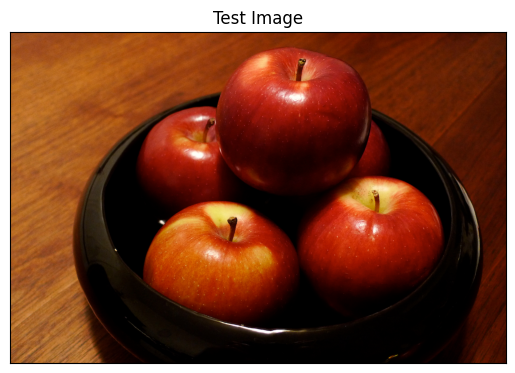

In [35]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/vegetable dataset/test/apple/Image_7.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [30]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [31]:
print(predictions)

[[9.99989390e-01 1.47401252e-07 2.90775820e-10 8.86302531e-10
  1.32554057e-09 2.08717865e-09 1.34335772e-12 4.12367085e-10
  1.32218417e-10 5.00337272e-11 4.90189139e-12 1.02463895e-08
  1.65659415e-07 7.31843752e-12 2.66167688e-09 6.51898466e-11
  3.90803327e-11 1.73876732e-10 1.27115315e-11 1.54572866e-09
  1.72262304e-07 1.29630484e-09 6.25188221e-08 1.99741290e-09
  3.66541020e-10 1.15782317e-09 3.01212416e-10 7.31724514e-10
  6.41387672e-08 1.61658317e-12 4.73113302e-13 3.89879925e-12
  1.05030640e-09 1.20415110e-11 7.81176013e-08 9.96751533e-06]]


In [32]:
result_index = np.argmax(predictions) #Return index of max element

In [33]:
result_index

0

In [34]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a apple
